Here I will plot the optimized F function, assuming the beetles aggregate optimally within a grid cell. The main point will be to show how k changes and what F looks like, and then to show how changes in kmin and kmax affect F.

In [1]:
import spatialfunctions as sf
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.family'] = 'serif'

# Make plot colors and things to make it easier to be consistent
cmap = plt.cm.get_cmap('Greens').reversed()

# Figsize consistent
figsize = (3,3)

/var/folders/l1/prbyqvgx4mg745chvp4d8x3r0000gn/T/ipykernel_67530/4279713805.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Greens').reversed()


In [3]:
# Set params
#s = 0.99
#N = 60
c = 1300
p = 250

# For when we vary p
plist = np.arange(100,625,25)
plen = len(plist)

# Get the list of functions. Do this as a dictionary where the keys are the p values
foptlist = {}
mlist = {}
klist = {}
for pp in plist:
    foptlist[pp],mlist[pp],klist[pp] = sf.getfopt(pp,c,returnk=True)

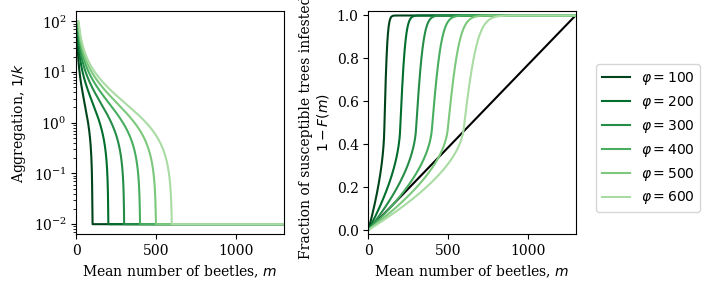

In [11]:
# Plot
fig,axs = plt.subplots(1,2,figsize=(figsize[0]*2.4,figsize[0]),tight_layout = True)
# Get colormap for p's
cdiscrete = cmap(np.linspace(0, 1, plen+3))
for i,pp in enumerate(plist[::4]):
    axs[0].semilogy(mlist[pp],1/klist[pp],c=cdiscrete[i*3])
    axs[1].plot(mlist[pp],1-foptlist[pp](mlist[pp]),c=cdiscrete[i*3],label=r'$\varphi={:.0f}$'.format(pp))
axs[1].plot(mlist[pp],mlist[pp]/c,c='k',zorder=-99)
for ax in axs:
    ax.set_xlim(0,c)
    ax.set_xlabel(r'Mean number of beetles, $m$')
axs[0].set_ylabel(r'Aggregation, $1/k$')
axs[1].set_ylabel('Fraction of susceptible trees infested, \n' r'$1-F(m)$')
axs[1].set_ylim(-0.02,1.02)
axs[1].legend(loc=(1.1,0.1))
plt.savefig('figures/optimizedF.pdf',bbox_inches='tight',pad_inches=0.18)

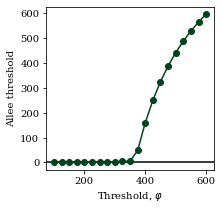

In [21]:
# Plot Allee threshold
fig,ax = plt.subplots(1,1,figsize=figsize)

mallee = []
for pp in plist:
    # Find Allee threshold
    mallee.append(opt.root_scalar(lambda x: x/c - 1 + foptlist[pp](x),bracket=[1e-3,3*c/4]).root)
ax.plot(plist,mallee,'o-',c=cdiscrete[0])
ax.axhline(0,c='k',zorder=-99)
ax.set_ylabel('Allee threshold')
ax.set_xlabel(r'Threshold, $\varphi$')
fig.savefig('figures/allee_threshold.pdf',bbox_inches='tight')

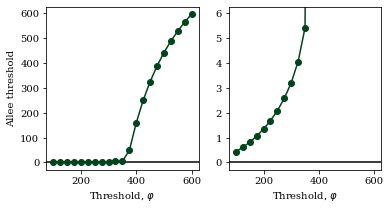

In [18]:
# Plot Allee threshold with smaller y-axis as well
fig,axs = plt.subplots(1,2,figsize=(figsize[0]*2,figsize[0]))

axs[0].plot(plist,mallee,'o-',c=cdiscrete[0])
axs[0].set_ylabel('Allee threshold')
xlim0 = axs[0].get_xlim()
ylim0 = axs[0].get_ylim()
axs[1].plot(plist,mallee,'o-',c=cdiscrete[0])
axs[1].set_ylim([y0*0.01 for y0 in ylim0])
axs[1].set_xlim(xlim0)
for ax in axs:
    ax.axhline(0,c='k',zorder=-99)
    ax.set_xlabel(r'Threshold, $\varphi$')
fig.savefig('figures/allee_threshold_alt.pdf',bbox_inches='tight')

# Vary kmin and kmax

In [8]:
# kmin and kmax
kminlist = np.logspace(-3,0,num=4)
kmaxlist = np.logspace( 1,4,num=4)
# Make appropriate cmap
ck = cmap
ck = ck(np.linspace(0, 1, len(kminlist)+3))

# Get fopt for these kmin and kmax. Fix p at central value
foptkmin = []
for kk in kminlist:
    foptkmin.append(sf.getfopt(p,c,kmin=kk))
foptkmax = []
for kk in kmaxlist:
    foptkmax.append(sf.getfopt(p,c,kmax=kk))

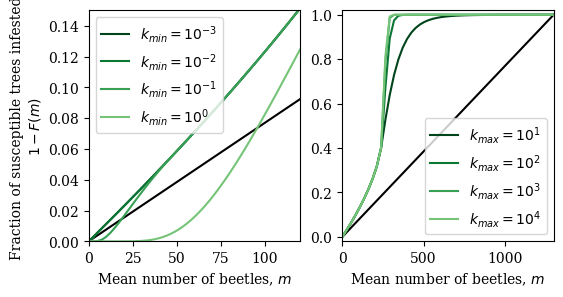

In [21]:
# Plot both
fig,axs = plt.subplots(1,2,figsize=(figsize[0]*2,figsize[0]))
# Plot for a common mrange
for i,(kk,fopt) in enumerate(zip(kminlist,foptkmin)):
    xlim1 = (0,120)
    mr1 = np.linspace(xlim1[0],xlim1[1])
    axs[0].plot(mr1,1-fopt(mr1),c=ck[i],label=r'$k_{{min}}=10^{{{:.0f}}}$'.format(np.log10(kk)))
    axs[0].set_xlim(xlim1[0],xlim1[1])
    axs[0].set_ylim(0,0.15)
axs[0].plot(mr1,mr1/c,c='k',zorder=-99)
axs[0].legend()
for i,(kk,fopt) in enumerate(zip(kmaxlist,foptkmax)):
    xlim2 = (0,c)
    mr2 = np.linspace(xlim2[0],xlim2[1])
    axs[1].plot(mr2,1-fopt(mr2),c=ck[i],label=r'$k_{{max}}=10^{{{:.0f}}}$'.format(np.log10(kk)))
    axs[1].set_xlim(xlim2[0],xlim2[1])
    axs[1].set_ylim(-0.02,1.02)
axs[1].plot(mr2,mr2/c,c='k',zorder=-99)
axs[1].legend()
# Labels
for ax in axs:
    ax.set_xlabel(r'Mean number of beetles, $m$')
axs[0].set_ylabel('Fraction of susceptible trees infested,\n' r'$1-F(m)$')
fig.savefig('figures/varykminmax.pdf',bbox_inches='tight',pad_inches=0.18)

In [15]:
# Get the allee threshold for each kmin and p
mallee_kmin = np.zeros([4,plen])
for i,kk in enumerate(kminlist):
    for j,pp in enumerate(plist):
        # Find fopt
        fopt_temp = sf.getfopt(pp,c,kmin=kk)
        # Find Allee threshold
        mallee_temp = opt.root_scalar(lambda x: x/c - 1 + fopt_temp(x),bracket=[1e-6,3*c/4]).root
        mallee_kmin[i,j] = mallee_temp

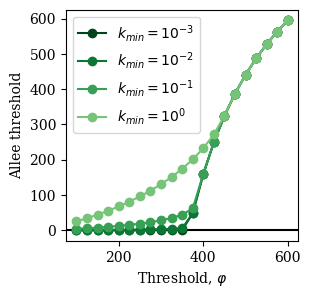

In [92]:
# Plot Allee threshold with kmin varying
fig,ax = plt.subplots(1,1,figsize=figsize)

for i,kk in enumerate(kminlist):
    ax.plot(plist,mallee_kmin[i],'o-',c=ck[i],label=r'$k_{{min}}=10^{{{:.0f}}}$'.format(np.log10(kk)))
ax.legend()
ax.axhline(0,c='k',zorder=-99)
#ax.set_ylim(0,250)
#ax.set_xlim(90,400)
ax.set_ylabel('Allee threshold')
ax.set_xlabel(r'Threshold, $\varphi$')
fig.savefig('figures/allee_threshold_varykmin.pdf',bbox_inches='tight')

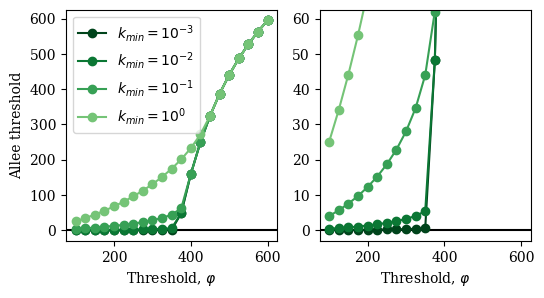

In [93]:
# Plot Allee threshold with smaller y-axis as well
fig,axs = plt.subplots(1,2,figsize=(figsize[0]*2,figsize[0]))

for i,kk in enumerate(kminlist):
    axs[0].plot(plist,mallee_kmin[i],'o-',c=ck[i],label=r'$k_{{min}}=10^{{{:.0f}}}$'.format(np.log10(kk)))
    axs[1].plot(plist,mallee_kmin[i],'o-',c=ck[i],label=r'$k_{{min}}=10^{{{:.0f}}}$'.format(np.log10(kk)))
axs[0].set_ylabel('Allee threshold')
axs[0].legend()
xlim0 = axs[0].get_xlim()
ylim0 = axs[0].get_ylim()
axs[1].set_ylim([y0*0.1 for y0 in ylim0])
axs[1].set_xlim(xlim0)
for ax in axs:
    ax.axhline(0,c='k',zorder=-99)
    ax.set_xlabel(r'Threshold, $\varphi$')
fig.savefig('figures/allee_threshold_varykmin_alt.pdf',bbox_inches='tight')

In [94]:
# Verify this doesn't change with kmax
mallee_kmax = np.zeros([4,plen])
for i,kk in enumerate(kmaxlist):
    for j,pp in enumerate(plist):
        # Find fopt
        fopt_temp = sf.getfopt(pp,c,kmax=kk)
        # Find Allee threshold
        mallee_temp = opt.root_scalar(lambda x: x/c - 1 + fopt_temp(x),bracket=[1e-6,3*c/4]).root
        mallee_kmax[i,j] = mallee_temp

Text(0.5, 0, 'Threshold, $\\varphi$')

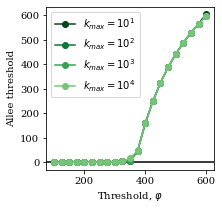

In [25]:
# Plot Allee threshold with kmin varying
fig,ax = plt.subplots(1,1,figsize=figsize)

for i,kk in enumerate(kmaxlist):
    ax.plot(plist,mallee_kmax[i],'o-',c=ck[i],label=r'$k_{{max}}=10^{{{:.0f}}}$'.format(np.log10(kk)))
ax.legend()
ax.axhline(0,c='k',zorder=-99)
#ax.set_ylim(0,250)
#ax.set_xlim(90,400)
ax.set_ylabel('Allee threshold')
ax.set_xlabel(r'Threshold, $\varphi$')
#fig.savefig('figures/allee_threshold_varykmax.pdf',bbox_inches='tight')

# Vary kmin by density
Rather than minimizing to a set value of k, minimize until m reaches a predetermined value where beetles begin to behave differently (ie. an endemic level of beetle). Here we set the fix point assuming that the transition occurs around 20 attacks/ha, with a stand density of 1225 stems/ha. This is from Boone et al. 2011. 

In [33]:
# Again get the functions for varying p values
foptlist_alt = {}
mlist_alt = {}
klist_alt = {}
# This time we also want a list of mfix. 
# This is the total number of beetles at the endemic transition divided by the approximate stand density to get the approximate average
# Here we use the numbers from Boone et al. for their definition of epidemic and their average stand density
# (note the 5 and 1000 was more of an estimate, I think 20/1225 is better and conveniently works much better for me...)
mfixlist = plist*20/1225#plist*5/1000
for pp,mf in zip(plist,mfixlist):
    # Set kmin very small so we do not run into it.
    foptlist_alt[pp],mlist_alt[pp],klist_alt[pp] = sf.getfopt(pp,c,returnk=True,kmin=1e-4,kmax=1e2,mfix=mf)

# Now save the values of kmin in a list as well to compare
kmin_mfix = np.array([klist_alt[pp][0] for pp in plist])

In [34]:
mfixlist

array([1.63265306, 2.04081633, 2.44897959, 2.85714286, 3.26530612,
       3.67346939, 4.08163265, 4.48979592, 4.89795918, 5.30612245,
       5.71428571, 6.12244898, 6.53061224, 6.93877551, 7.34693878,
       7.75510204, 8.16326531, 8.57142857, 8.97959184, 9.3877551 ,
       9.79591837])

In [35]:
kmin_mfix

array([0.00814636, 0.00749275, 0.00828938, 0.00817835, 0.00823979,
       0.00731061, 0.00757929, 0.00793869, 0.00726742, 0.00773077,
       0.00827392, 0.00771381, 0.00722457, 0.00783843, 0.00739647,
       0.00807856, 0.00766856, 0.00729806, 0.00803234, 0.00767775,
       0.00735315])

0.007749000973303207


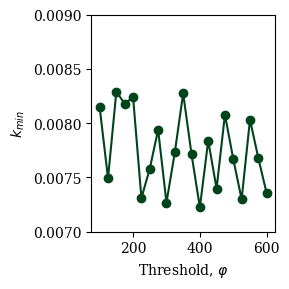

In [51]:
# Plot
fig,ax = plt.subplots(1,1,figsize=figsize,tight_layout = True)
# Get colormap for p's for the alternative case
#cdiscrete2 = plt.cm.get_cmap('RdPu').reversed()(np.linspace(0, 1, plen+3))

ax.plot(plist,kmin_mfix,'o-',c=ck[0])
#ax.set_xlim(0,15)
ax.set_ylim(0.007,0.009)
ax.set_xlabel(r'Threshold, $\varphi$')
ax.set_ylabel(r'$k_{min}$')
plt.savefig('figures/kmin_mfix.pdf',bbox_inches='tight')
print(kmin_mfix.mean())

/var/folders/l1/prbyqvgx4mg745chvp4d8x3r0000gn/T/ipykernel_67530/1610879323.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cdiscrete2 = plt.cm.get_cmap('RdPu').reversed()(np.linspace(0, 1, plen+3))


Text(0, 0.5, 'Aggregation, $1/k$')

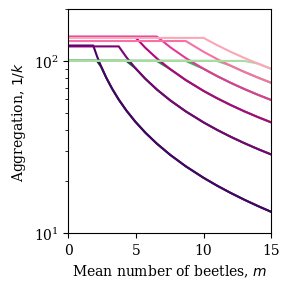

In [12]:
# Plot
fig,ax = plt.subplots(1,1,figsize=figsize,tight_layout = True)
# Get colormap for p's for the alternative case
cdiscrete2 = plt.cm.get_cmap('RdPu').reversed()(np.linspace(0, 1, plen+3))
for i,pp in enumerate(plist[::4]):
    ax.semilogy(mlist[pp],1/klist[pp],c=cdiscrete[i*3])
    ax.semilogy(mlist_alt[pp],1/klist_alt[pp],c=cdiscrete2[i*3])

ax.set_xlim(0,15)
ax.set_ylim(10,200)
ax.set_xlabel(r'Mean number of beetles, $m$')
ax.set_ylabel(r'Aggregation, $1/k$')
#plt.savefig('figures/optimizedF_alt.pdf',bbox_inches='tight')

Text(0, 0.5, 'Fraction of susceptible trees infested,\n$1-F(m)$')

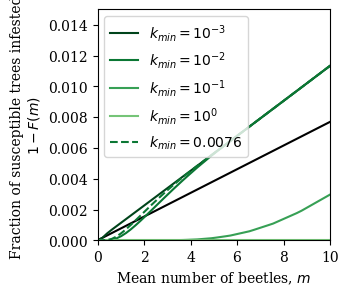

In [13]:
# Now plot f directly as well
fig,ax = plt.subplots(1,1,figsize=figsize)
for i,(kk,fopt) in enumerate(zip(kminlist,foptkmin)):
    xlim1 = (0,120)
    mr1 = np.linspace(xlim1[0],10)
    ax.plot(mr1,1-fopt(mr1),c=ck[i],label=r'$k_{{min}}=10^{{{:.0f}}}$'.format(np.log10(kk)))
# And add in one for p=some value
ax.plot(mr1,1-foptlist_alt[250](mr1),'--',c=ck[1],label=r'$k_{{min}}={:.4f}$'.format(klist_alt[250][0]))

ax.set_xlim(xlim1[0],10)
ax.set_ylim(0,0.015)
ax.plot(mr1,mr1/c,c='k',zorder=-99)
ax.legend()
ax.set_xlabel(r'Mean number of beetles, $m$')
ax.set_ylabel('Fraction of susceptible trees infested,\n' r'$1-F(m)$')
#fig.savefig('figures/varykminmax_alt.pdf',bbox_inches='tight',pad_inches=0.18)

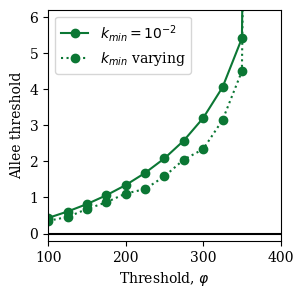

In [48]:
# Allee threshold

# Get the allee threshold for each kmin and p
mallee_kmin_mfix = np.zeros([plen])
for j,pp in enumerate(plist):
    # Find Allee threshold
    mallee_temp = opt.root_scalar(lambda x: x/c - 1 + foptlist_alt[pp](x),bracket=[1e-6,3*c/4]).root
    mallee_kmin_mfix[j] = mallee_temp
        
fig,ax = plt.subplots(1,1,figsize=figsize)
ax.plot(plist,mallee_kmin[1],'o-',c=ck[1],label=r'$k_{{min}}=10^{{{:.0f}}}$'.format(np.log10(kminlist[1])))
ax.plot(plist,mallee_kmin_mfix,'o:',c=ck[1],label=r'$k_{{min}}$ varying'.format(kmin_mfix))
ax.legend()
ax.axhline(0,c='k',zorder=-99)
ax.set_ylim(-0.2,6.2)
ax.set_xlim(100,400)
ax.set_ylabel('Allee threshold')
ax.set_xlabel(r'Threshold, $\varphi$')
fig.savefig('figures/allee_threshold_varykmin_mfix.pdf',bbox_inches='tight')